# a. Import the required Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

##pandas: For loading and handling the dataset.

##numpy: Used for numerical computations.

##seaborn and matplotlib.pyplot: For visualizing data, especially the heatmap.

##sklearn.model_selection.train_test_split: To split the dataset into training and testing sets.

##sklearn.linear_model.LinearRegression: For training the regression model.

##sklearn.metrics: To evaluate model performance using metrics like MSE and R².

# b. Read the Dataset

In [ ]:
df = pd.read_csv("Real estate.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


##This reads the dataset (Real estate.csv) into a pandas DataFrame.

##.head() shows the first 5 rows to understand the data structure.

# c. Visualize the Data Using Heatmap

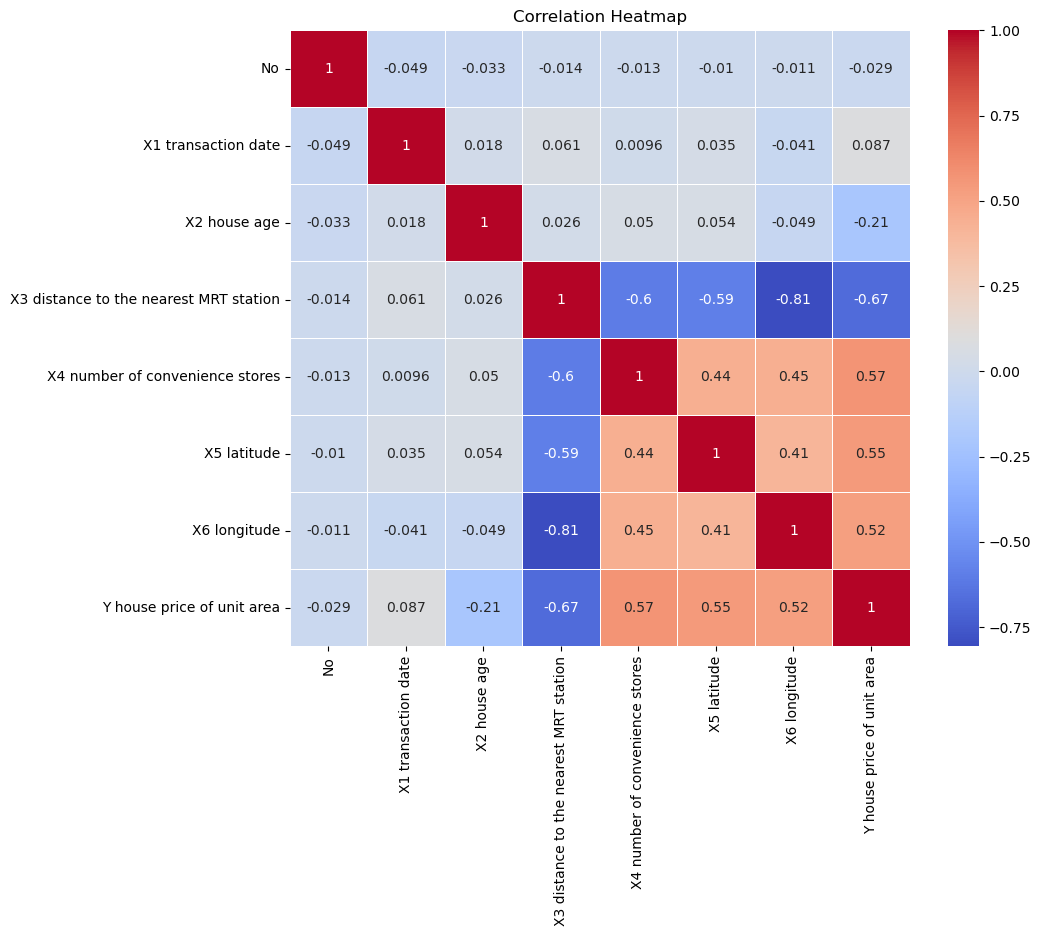

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

##df.corr() calculates pairwise correlation between features.

##sns.heatmap plots a heatmap to visualize how strongly features relate to each other (and to the target variable).

##annot=True: displays correlation values on the heatmap.

# d. Check the Correlations in the Dataset

In [ ]:
correlations = df.corr()
print(correlations["Y house price of unit area"].sort_values(ascending=False))

Y house price of unit area                1.000000
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
X1 transaction date                       0.087491
No                                       -0.028587
X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
Name: Y house price of unit area, dtype: float64


##This gives a sorted list of correlation values between all features and the target variable (Y house price of unit area), helping you see which features are most useful.

# e. Make Features

In [ ]:
X = df.drop(columns=['No', 'Y house price of unit area'])
y = df['Y house price of unit area']

##X: Independent variables (features).

##y: Dependent variable (target to predict).

##These are separated so we can train the model.

# f. Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Splits data into training (80%) and testing (20%) sets.

##random_state=42: ensures the split is reproducible.

# g. Generate and Train Regression Model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

##model = LinearRegression() initializes the model.

##model.fit(...) trains it using the training data.

# h. Check Coefficients, Intercept, and R² Value

In [ ]:
print("Intercept:", model.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

# R² Score
r2 = model.score(X_test, y_test)
print("R-Squared:", r2)

Intercept: -13044.231917160485
Coefficients:
X1 transaction date: 5.4407
X2 house age: -0.2708
X3 distance to the nearest MRT station: -0.0048
X4 number of convenience stores: 1.0914
X5 latitude: 229.0431
X6 longitude: -29.4926
R-Squared: 0.6810580555096022


##intercept_: The value of y when all features are 0.

##coef_: The slope (impact) of each feature on the target.

##score: R² value — how well the model explains the variance in the data (1 is perfect, 0 is worst).

# i. Evaluate the Model Performance

Mean Squared Error: 53.505619124500804
Root Mean Squared Error: 7.314753524521575


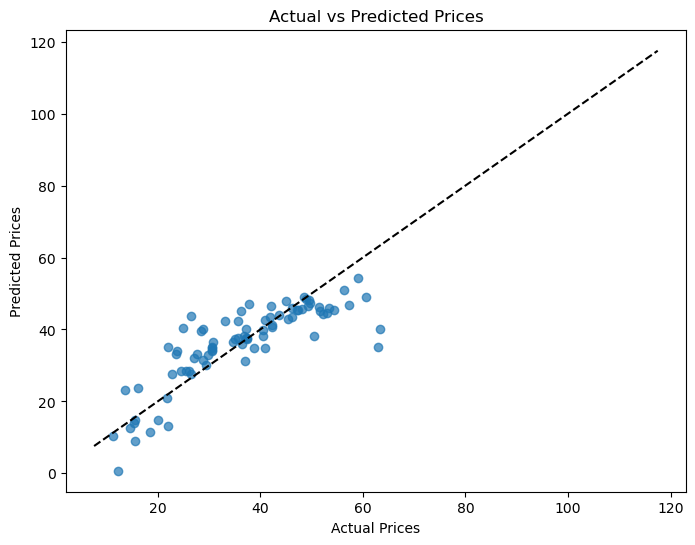

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.show()

##predict: Generates predictions for the test data.

##mean_squared_error: Measures average squared difference between predictions and actual values.

##np.sqrt(mse): Converts MSE to RMSE for easier interpretation (in same units as price).